In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np


In [3]:
def to_res_list(x):
    res = np.zeros(10)
    res[x] = 1
    return res


def load_mnist(path, kind='train'):
    import os
    import gzip

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)
        # labels = labels.reshape(len(labels))
        # labels = np.array([to_res_list(x) for x in labels], dtype=np.uint8).reshape(len(labels),10,1)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [4]:
imgs, labels = load_mnist('', 'train')
imgs.shape

(60000, 784)

In [38]:
ks = np.array(range(1,31))
score = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(imgs, labels)
    av = np.average([int(x==y) for x,y in zip(knn.predict(imgs), labels)])
    score.append(av)
    # score.append(np.mean(cross_val_score(knn, imgs, labels, cv=5)))

In [46]:
ks = np.array(range(1, 31))
scores = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(imgs, labels)
    av = np.average([int(x == y) for x, y in zip(knn.predict(imgs), labels)])
    scores.append(av)


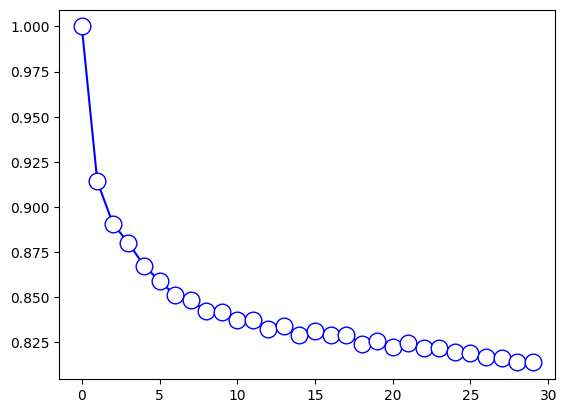

In [39]:

plt.plot(scores, color='b', marker='.', linestyle='solid', markersize=24, mfc='white')


In [41]:
knn = KNeighborsClassifier(n_neighbors=1)

In [42]:
knn.fit(imgs, labels)

KNeighborsClassifier(n_neighbors=1)

In [45]:
# score[3]
np.mean([int(x==y) for x,y in zip(knn.predict(imgs), labels)])
# np.mean(cross_val_score(knn, imgs, labels, cv=5))

0.8139166666666666